#BITCOIN PRICE PREDICTOR

###Project Members-
1. Abhijeet Kumar (ENG19CS0009)
2. Abhijith JK    (ENG19CS0010)
3. Amisha Asrani  (ENG19CS0029)
4. Aryan Kumar    (ENG19CS0044)

In [ ]:
#importing necessary libraries
import numpy as np
from matplotlib import pyplot
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

##DATA COLLECTION

In [ ]:
data = pd.read_csv('/content/BTC-USD (5).csv', date_parser = True)

In [ ]:
print('Total number of days present in the dataset: ',data.shape[0])
print('Total number of fields present in the dataset: ',data.shape[1])
data.shape

Total number of days present in the dataset:  366
Total number of fields present in the dataset:  7


(366, 7)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-26,18729.839844,18866.285156,16351.035156,17150.623047,17150.623047,61396835737
1,2020-11-27,17153.914063,17445.023438,16526.423828,17108.402344,17108.402344,38886494645
2,2020-11-28,17112.933594,17853.939453,16910.652344,17717.414063,17717.414063,32601040734
3,2020-11-29,17719.634766,18283.628906,17559.117188,18177.484375,18177.484375,31133957704
4,2020-11-30,18178.322266,19749.263672,18178.322266,19625.835938,19625.835938,47728480399


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2021-11-22,58706.847656,59266.359375,55679.839844,56289.289063,56289.289063,35036121783
362,2021-11-23,56304.554688,57875.515625,55632.761719,57569.074219,57569.074219,37485803899
363,2021-11-24,57565.851563,57803.066406,55964.222656,56280.425781,56280.425781,36635566789
364,2021-11-25,57165.417969,59367.968750,57146.683594,57274.679688,57274.679688,34284016248
365,2021-11-26,59043.957031,59180.343750,53625.210938,54500.160156,54500.160156,43114151936


In [ ]:
#checking for null values in main dataset
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [ ]:
#We dont need 'Date' Column to make predictions so we drop it
data=data.drop(data[['Date']],axis=1)
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,18729.839844,18866.285156,16351.035156,17150.623047,17150.623047,61396835737
1,17153.914063,17445.023438,16526.423828,17108.402344,17108.402344,38886494645
2,17112.933594,17853.939453,16910.652344,17717.414063,17717.414063,32601040734
3,17719.634766,18283.628906,17559.117188,18177.484375,18177.484375,31133957704
4,18178.322266,19749.263672,18178.322266,19625.835938,19625.835938,47728480399


In [ ]:
x=data.copy()
x=x.drop(x[['Close']],axis=1)
x.shape

(366, 5)

In [ ]:
y=data.copy()
y=y.drop(y[['Open','High','Low','Adj Close','Volume']],axis=1)
y.shape

(366, 1)

##FEATURE EXTRACTION

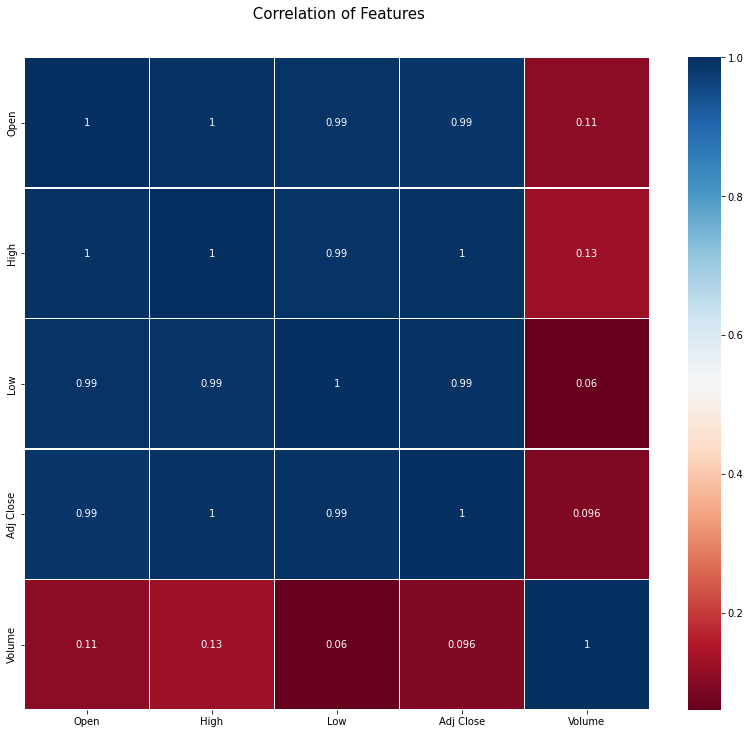

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title(' Correlation of Features', y=1.05, size=15)
sns.heatmap(x.corr(),cmap=colormap, linewidths = 0.30, annot = True)

We are dropping the 'High' and 'Adj Close' columns for training,validation and test data

In [ ]:
x=x.drop(x[['High','Adj Close']],axis=1)
x.shape

(366, 3)

##SPLITING OF DATA

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [ ]:
x_train.shape

(233, 3)

In [ ]:
y_train.shape

(233, 1)

In [ ]:
x_val.shape

(59, 3)

In [ ]:
y_val.shape

(59, 1)

In [ ]:
x_test.shape

(74, 3)

In [ ]:
y_test.shape

(74, 1)

##SCALING OF DATA

In [ ]:

#Scalar transformation of target variable
fscaler = MinMaxScaler()
fscaler.fit(x_train)
x_train= fscaler.transform(x_train)
x_val= fscaler.transform(x_val)
x_test= fscaler.transform(x_test)


In [ ]:
#Scalar transformation of target variable
scaler = MinMaxScaler()
scaler.fit(y_train)
y_train= scaler.transform(y_train)
y_val= scaler.transform(y_val)
y_test= scaler.transform(y_test)

##BUILDING MODEL

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'sigmoid', return_sequences = True,input_shape=(None,1) ))

In [ ]:
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'sigmoid', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'sigmoid', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 120, activation = 'sigmoid'))
model.add(Dropout(0.2)) 
model.add(Dense(units =1,activation='sigmoid'))


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics='mean_squared_error')

In [ ]:
history=model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs = 250,batch_size=80)

Epoch 1/250
3/3 [==============================] - 6s 387ms/step - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 2/250
3/3 [==============================] - 0s 33ms/step - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 3/250
3/3 [==============================] - 0s 32ms/step - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 4/250
3/3 [==============================] - 0s 33ms/step - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 5/250
3/3 [==============================] - 0s 31ms/step - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.0781 - val_mean_squared_error: 0.0781
Epoch 6/250
3/3 [==============================] - 0s 32ms/step - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.0781 - val_mean_squared_error: 0.0781
Epoch 7/250
3/3 [======================

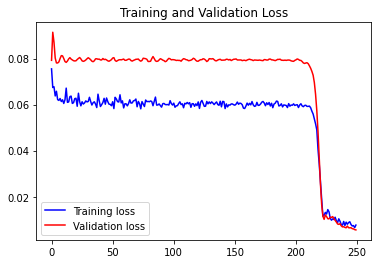

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

##MAKING PREDICTIONS

In [ ]:
y_pred = model.predict(x_test) 

y_pred[-10:-1]

array([[0.7126994 ],
       [0.18533713],
       [0.21398255],
       [0.77518183],
       [0.28533232],
       [0.20289502],
       [0.79400635],
       [0.8373089 ],
       [0.31233853]], dtype=float32)

In [ ]:
y_test[-10:-1]

array([[0.65645798],
       [0.03012274],
       [0.17703232],
       [0.75761135],
       [0.28940553],
       [0.12314866],
       [0.80909825],
       [1.01208014],
       [0.33605332]])

In [ ]:
error_arr=y_test-y_pred
error_arr[-10:-1]

array([[-0.05624143],
       [-0.15521439],
       [-0.03695024],
       [-0.01757048],
       [ 0.00407321],
       [-0.07974635],
       [ 0.0150919 ],
       [ 0.17477125],
       [ 0.02371479]])

In [ ]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [ ]:
y_pred


array([[39843.406],
       [57159.363],
       [30933.11 ],
       [44359.84 ],
       [44645.36 ],
       [32772.38 ],
       [42440.86 ],
       [54731.62 ],
       [56203.52 ],
       [43651.66 ],
       [33528.203],
       [50381.523],
       [58496.25 ],
       [36994.637],
       [32763.094],
       [47782.04 ],
       [35196.45 ],
       [26759.541],
       [36919.242],
       [56937.84 ],
       [34613.88 ],
       [57103.816],
       [36508.637],
       [26566.16 ],
       [58530.637],
       [43321.49 ],
       [57473.21 ],
       [58692.4  ],
       [57606.16 ],
       [58633.63 ],
       [48464.477],
       [36788.055],
       [50844.65 ],
       [56993.613],
       [30921.592],
       [47600.566],
       [31314.75 ],
       [49411.75 ],
       [32029.172],
       [59041.816],
       [47247.562],
       [56176.863],
       [33804.047],
       [46916.895],
       [37314.145],
       [27780.342],
       [50112.88 ],
       [27953.518],
       [50663.945],
       [45432.43 ],


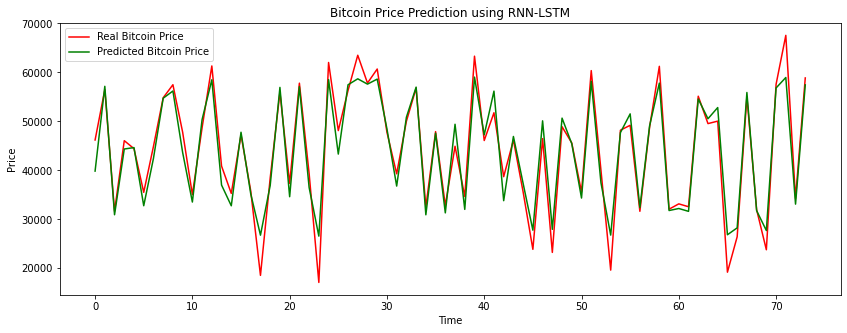

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

##FINDING ACCURACY

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)


0.06957143057601461